### 딥러닝 라이브러리
- tensorflow
- keras

In [1]:
from tensorflow.keras.datasets import mnist #손글씨데이터

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# matplotlib로 시각화하기
import matplotlib.pyplot as plt

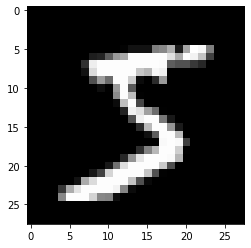

In [9]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

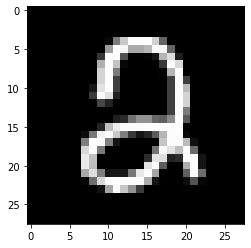

In [10]:
plt.imshow(X_train[7986], cmap='gray')
plt.show()

###  모델링

In [11]:
from tensorflow.keras.models import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense #입력층, 중간/출력층

In [14]:
model = Sequential() # 딥러닝 모델의 뼈대생성
model.add(InputLayer(input_shape=(784,))) #입력층 
model.add(Dense(units=20,activation='sigmoid')) #중간층 추가
model.add(Dense(units=40,activation='sigmoid')) #중간층 추가
model.add(Dense(units=30,activation='sigmoid')) #중간층 추가
model.add(Dense(units=10,activation='softmax')) #출력층 추가 (10개의 확률)

In [18]:
#모델 학습
#1. 모델의 학습 방법 및 평가방법 설정, loss와 optmizer는 어떻게 학습을 할것인지 정하는 역할
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='Adam',
             metrics = ['accuracy'])
#2. 모델학습
model.fit(X_train.reshape(60000,784),y_train,epochs = 50) #epochs : 데이터 학습 횟수

Epoch 1/50
1875/1875 [==============================] - 1s 465us/step - loss: 1.2429 - accuracy: 0.63280s - loss: 1.7
Epoch 2/50
1875/1875 [==============================] - 1s 457us/step - loss: 0.6213 - accuracy: 0.8119
Epoch 3/50
1875/1875 [==============================] - 1s 464us/step - loss: 0.5481 - accuracy: 0.8327
Epoch 4/50
1875/1875 [==============================] - 1s 462us/step - loss: 0.4965 - accuracy: 0.8488
Epoch 5/50
1875/1875 [==============================] - 1s 470us/step - loss: 0.4669 - accuracy: 0.8581
Epoch 6/50
1875/1875 [==============================] - 1s 473us/step - loss: 0.4451 - accuracy: 0.8632
Epoch 7/50
1875/1875 [==============================] - 1s 466us/step - loss: 0.4294 - accuracy: 0.8683
Epoch 8/50
1875/1875 [==============================] - 1s 464us/step - loss: 0.4158 - accuracy: 0.8726
Epoch 9/50
1875/1875 [==============================] - 1s 460us/step - loss: 0.4026 - accuracy: 0.8782
Epoch 10/50
1875/1875 [===========================

In [21]:
#모델 예측
pre = model.predict(X_test.reshape(10000,784))

In [23]:
pre.shape

(10000, 10)

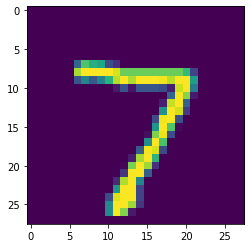

In [24]:
plt.imshow(X_test[0])
plt.show()

In [25]:
pre[0]

array([2.6245241e-06, 4.4257790e-06, 1.0401753e-04, 5.3870253e-04,
       4.4040748e-06, 6.7712288e-05, 4.0117740e-09, 9.9826366e-01,
       3.0311053e-06, 1.0115061e-03], dtype=float32)

In [30]:
#모델평가
pre_classes=pre.argmax(axis=1)

In [31]:
pre_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e32208b20c4ed1212565055a415d24c710bf4ec5da5de21fcaa0b2acfe60663f
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [35]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,pre_classes)

0.9207

In [34]:
#model 내부에 평가함수
model.evaluate(X_test.reshape(10000,784),y_test)

313/313 [==============================] - 0s 348us/step - loss: 0.2713 - accuracy: 0.9207


[0.2712835967540741, 0.9207000136375427]

### 모델저장

In [36]:
model.save("./hand_write_digit_model.h5")